# Visión artificial
## Trabajo final de la asignatura
---
### Alumnos: Oier Mentxaka y Christian Vaca
---

1. Calcular una estimación del área de la inundación de Texas (en km2). Para ello debes tener en cuenta que:
- Las distintas bandas pueden no estar correctamente alineadas. Debes alinearlas, aunque sea de forma manual.
- No consideres las franjas negras de las imágenes. Se deben a una avería en los sensores del satélite.
- Puedes usar los índices de humedad que tienes al final de este documento (NDWI, ...).
2. Con la imagen de fuego en Arizona:
- Si combinas las bandas 7, 5 y 4 (como R,G,B) puedes obtener una imagen en falso color que permite visualizar claramente la zona quemada y los focos del fuego. En la siguiente figura se muestran la imagen en color real y la imagen en falso color:

<p align="center">
  <img src="../Media/arizona_rgb.jpg" alt="rgb Image">
  <img src="../Media/arizona_fuego.jpg" alt="fuego Image">
</p>

- Calcula una estimación del área de la zona quemada (en km2). Esto puedes hacerlo de distintas formas:
  - Usando algún índice de vegetación (NDVI, ...). Al final de este documento tienes más información.
  - Usando la imagen en falso color.
  - ...
- Implementa el algoritmo de este documento y verifica si es útil para detectar los focos del incendio. Compara los resultados con la imagen anterior (falso color).

3. En la imagen de Adra, haz uso de la banda pancromática (alta resolución) para producir una imagen en color (RGB) de alta resolución (el doble de resolución que las bandas visibles R, G, B). Puedes aplicar algún algoritmo que mejore el color del resultado para darle más viveza o colorido. Para obtener una imagen RGB de mayor resolución usando la imagen pancromática usar:
- En la representacion HSV cambiar la luminancia por la imagen pancromatica
- Usando la transformada wavelet de la imagen pancromatica como se sugiere en  este artículo
- Cualquier otro algoritmo propuesto por vosotros/as.


En todos los casos debes redactar un informe detallando los pasos que has seguido para resolver el problema así como la bibliografía usada y ejemplos que ilustren el proceso.

La entrega consistirá en un único fichero en Jupyter-Notebook que contenga:

- El nombre de los participantes en esta práctica
- Una sección "Inundación en Texas" que contenga los resultados para el caso de la inundación en Texas.
- Una sección "Ariizona" que contiene los resultados para Arizona
- Una sección "Adra" que contenga los resultados para Adra
- En cada sección se realizará el análisis y comentarios necesarios junto con el código python usado para obtener los resultados. Si se propone diferentes alternativas crear secciones tales como Alternativa 1, Alternativa 2, etc.
- Finalmente añadir la bibliografía usada.



### Inundación Texas

#### Inpainting de las líneas

['septiembre_banda8.tif', 'rgb.jpg', 'agosto_banda8s.tif', 'agosto_banda62s.tif', 'septiembre_banda61s.tif', 'agosto_banda7.tif', 'agosto_banda4.tif', 'agosto_banda5.tif', 'agosto_banda1.tif', 'agosto_banda2.tif', 'agosto_banda3.tif', 'septiembre_banda8s.tif', 'septiembre_banda62.tif', 'agosto_banda8.tif', 'septiembre_banda61.tif', 'septiembre_banda62s.tif', 'septiembre_banda1.tif', 'septiembre_banda3.tif', 'septiembre_banda2.tif', 'agosto_banda61s.tif', 'agosto_banda61.tif', 'septiembre_banda7.tif', 'septiembre_banda5.tif', 'agosto_banda62.tif', 'septiembre_banda4.tif']


/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_75583/3860920619.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,8))


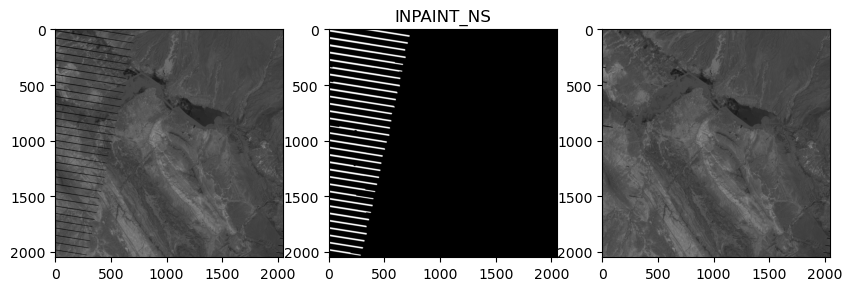

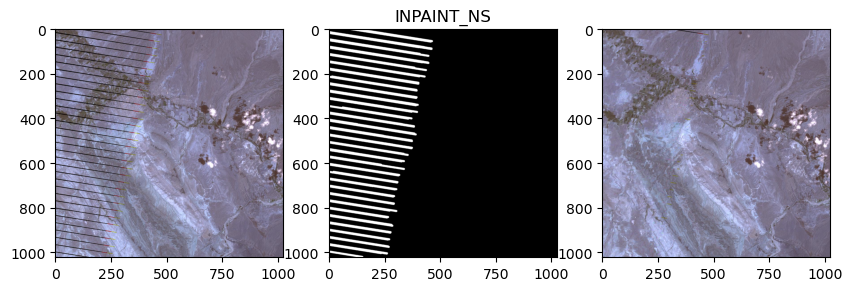

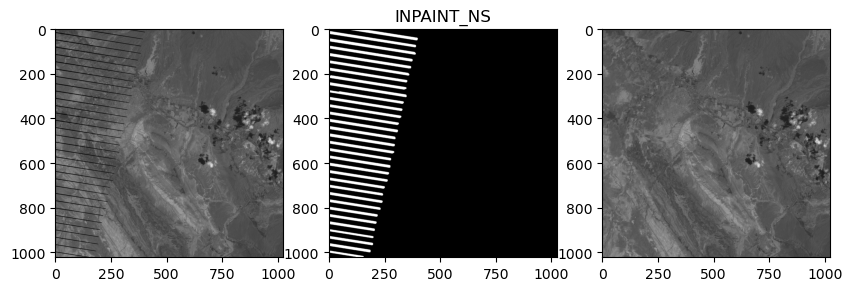

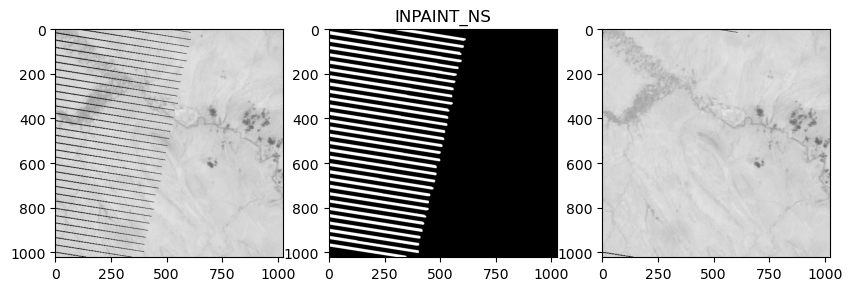

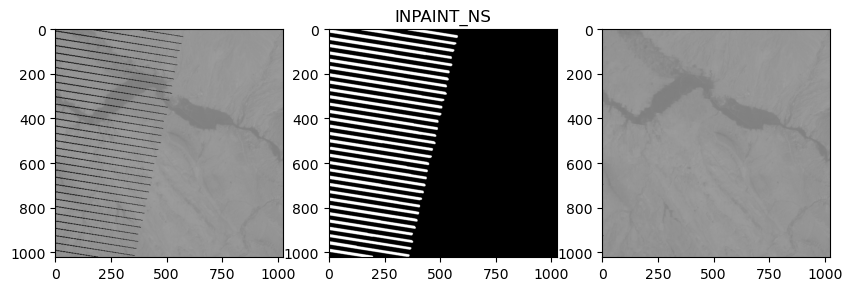

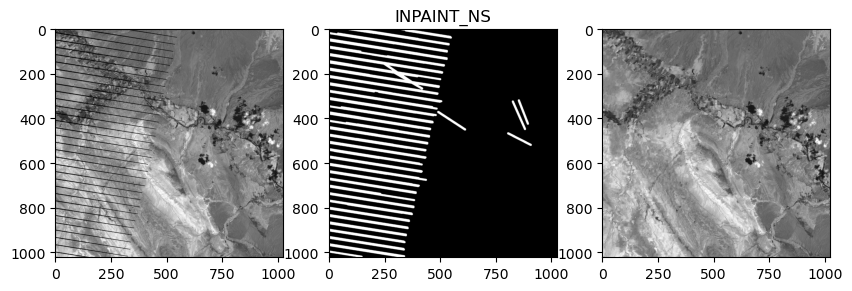

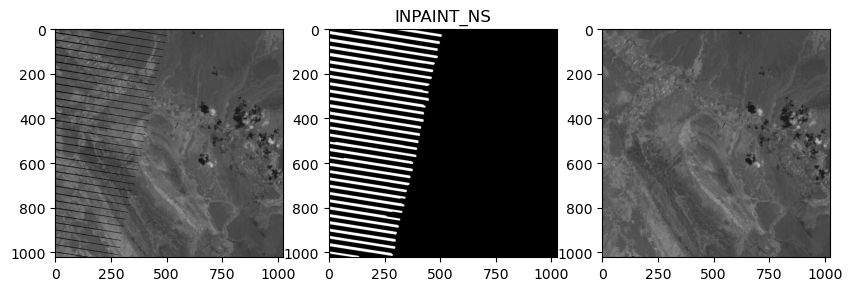

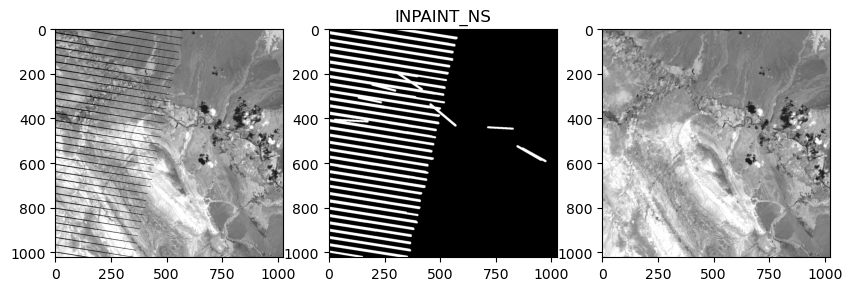

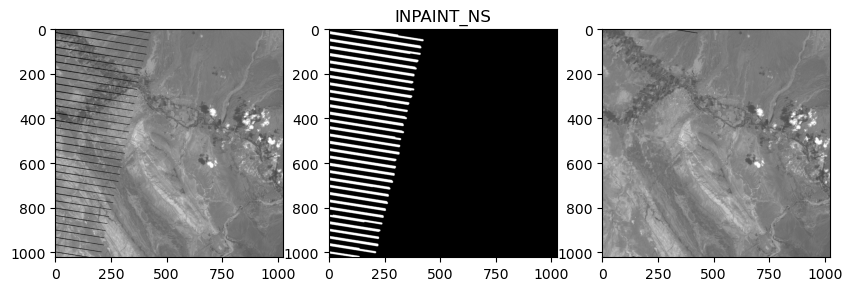

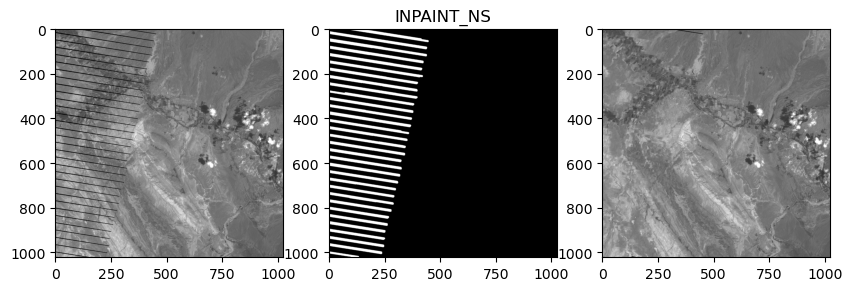

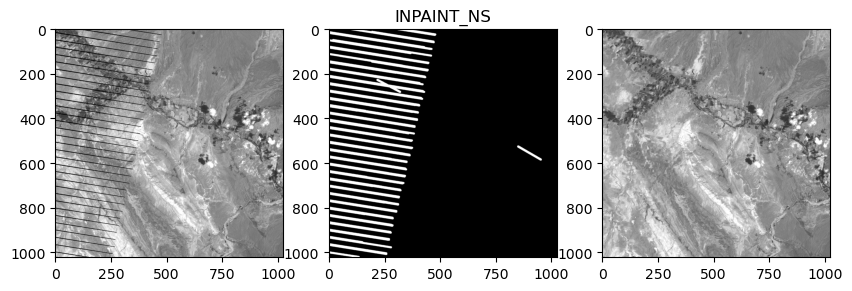

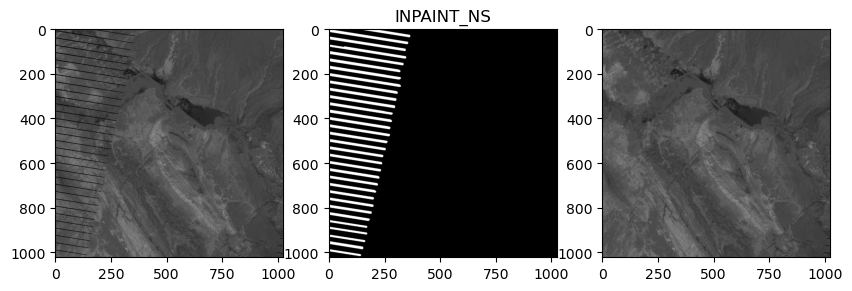

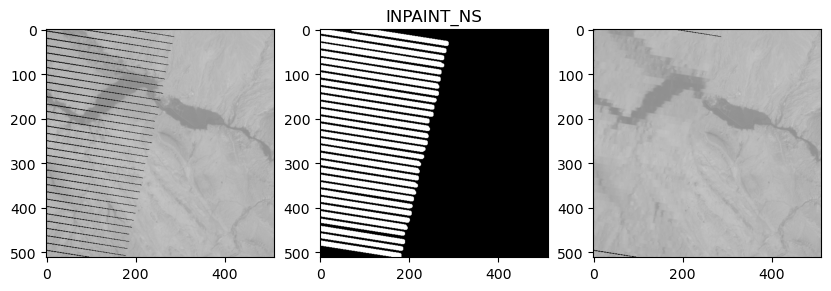

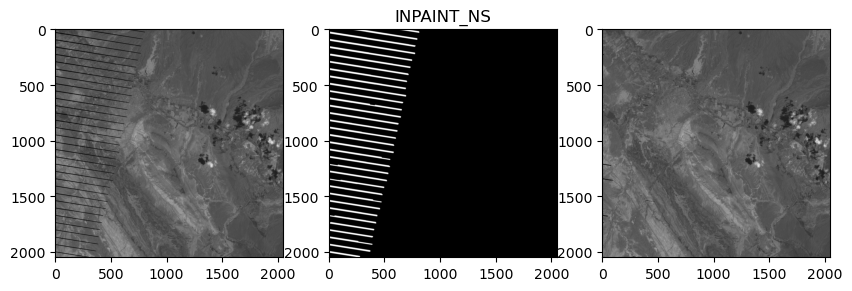

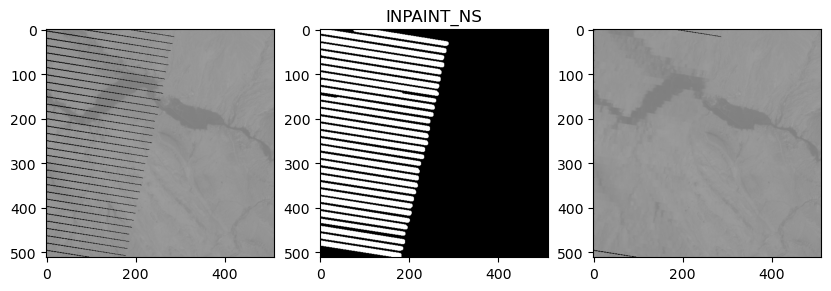

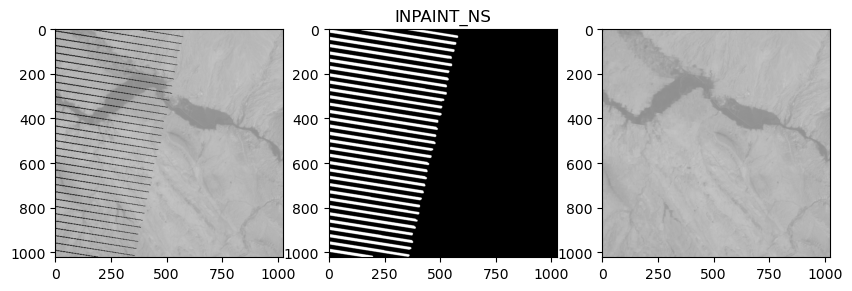

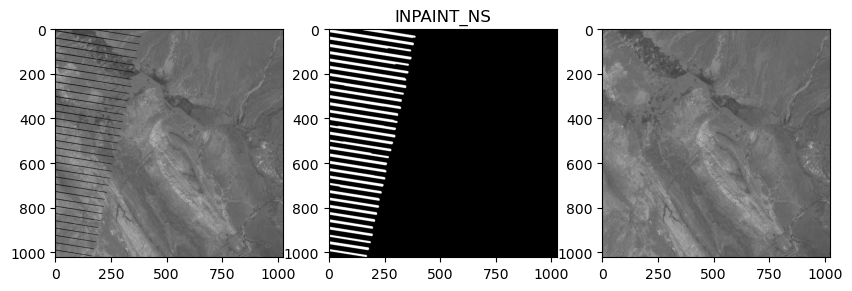

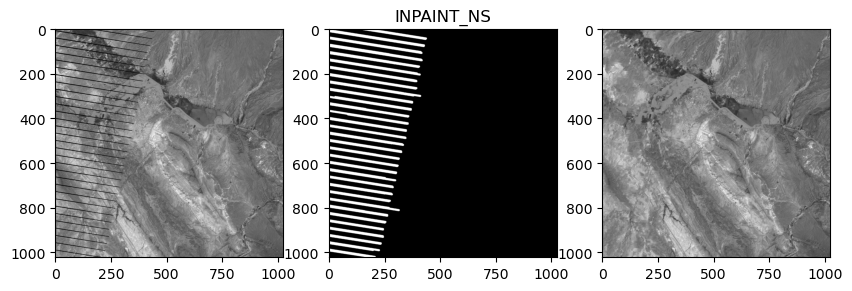

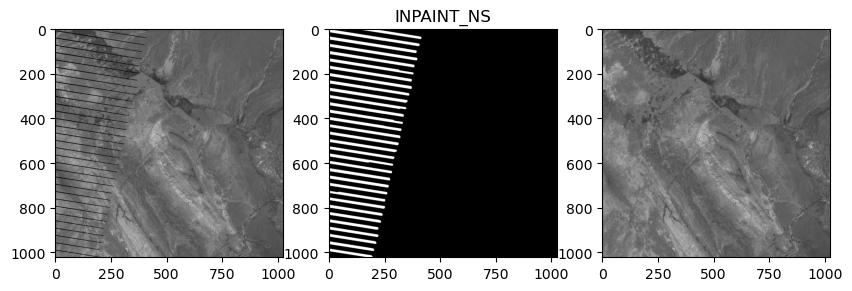

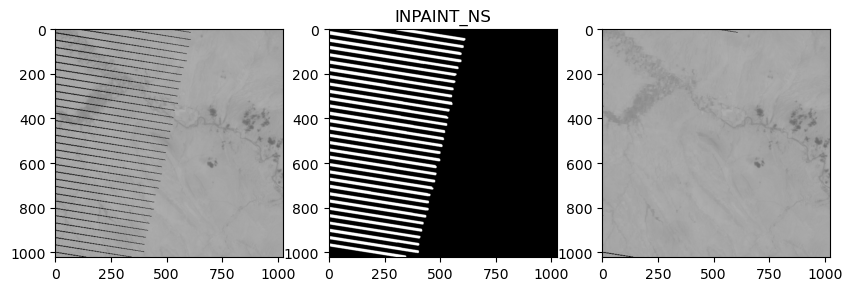

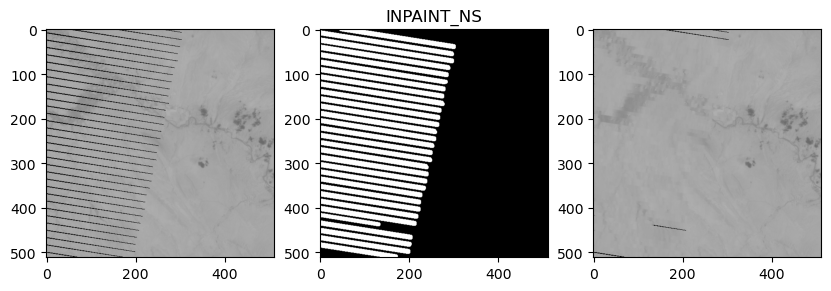

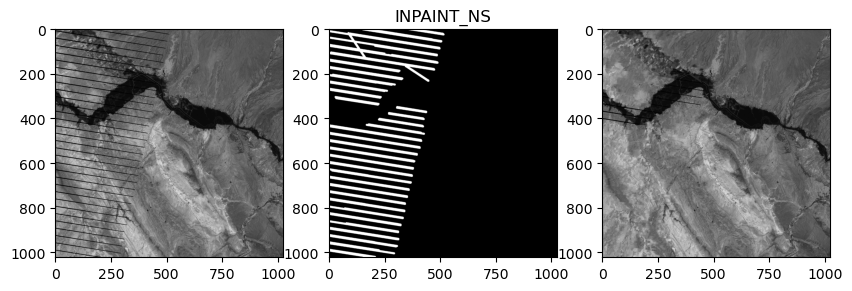

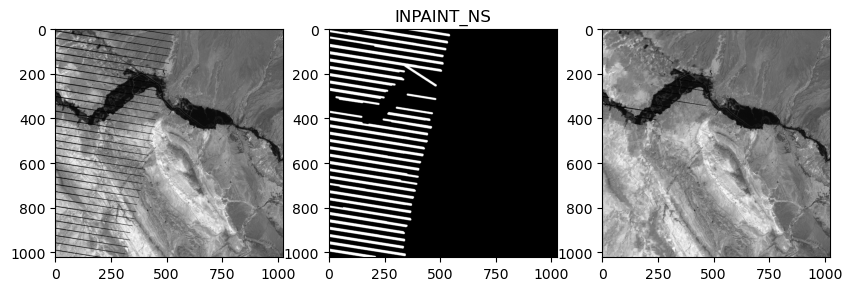

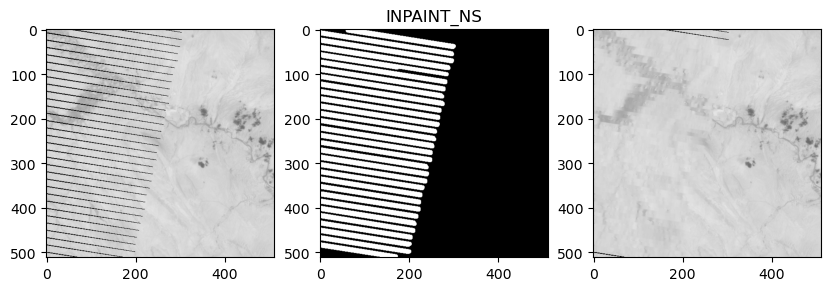

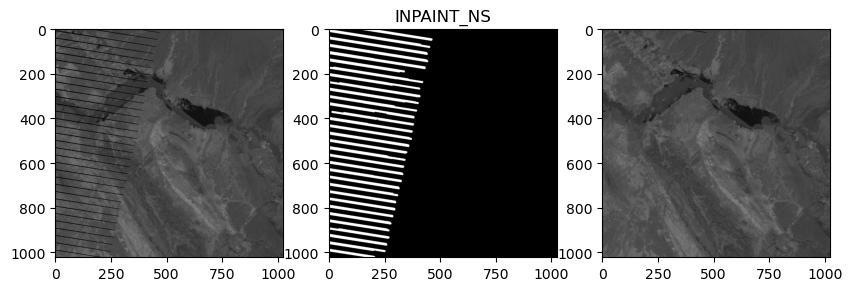

In [1]:
# Importar las bibliotecas necesarias
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Definir la ruta al directorio que contiene las imágenes
path = '../Data/texas/'

# Obtener una lista de archivos en el directorio
files = os.listdir(path)

# Definir los límites inferior y superior para el color verde
lower_green = np.array([40, 50, 50], dtype=np.uint8)
upper_green = np.array([80, 255, 255], dtype=np.uint8)

# Iterar a través de cada archivo en el directorio
print(files)
for file in files:
    # Leer el archivo de imagen
    image = cv2.imread(path + '/' + file)
    
    # Convertir la imagen de espacio de color BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar detección de bordes (opcional)
    edges = cv2.Canny(gray, 300, 150, apertureSize=3)

    # Realizar la Transformada de Hough Probabilística para líneas
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

    # Crear una máscara con las líneas detectadas
    mask = np.zeros_like(image)

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(mask, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Dilatar las líneas para hacerlas más visibles
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(mask, kernel, iterations=1)

    # Convertir la imagen a espacio de color HSV y aplicar la máscara de rango de color verde
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(cv2.cvtColor(dilated, cv2.COLOR_RGB2HSV), lower_green, upper_green)

    # Crear un subplot para mostrar la imagen original, la imagen enmascarada y la imagen reparada
    plt.figure(figsize=(10,8))
    plt.subplot(1,3,1)
    plt.imshow(img_rgb)
    plt.subplot(1,3,2)
    plt.title('INPAINT_NS')
    plt.imshow(mask, 'gray')
    
    # Reparar las regiones enmascaradas utilizando el método INPAINT_NS
    rec = cv2.inpaint(image, mask, 3, cv2.INPAINT_NS)
    rec = cv2.cvtColor(rec, cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,3)
    plt.imshow(rec)   

    # Guardar la imagen reparada
    cv2.imwrite('../Data/Inpaint/inpaint_'+file, rec)


Cálculo de Índice diferencial de agua normalizado (NDWI)

/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_75583/2035499306.py:4: RuntimeWarning: divide by zero encountered in divide
  salida_agosto = (banda4 - banda5) / (banda4 + banda5)


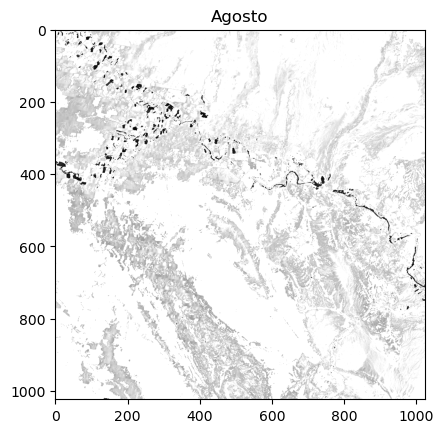

In [2]:
banda4 = cv2.imread('../Data/Inpaint/inpaint_agosto_banda4.tif', 0)
banda5 = cv2.imread('../Data/Inpaint/inpaint_agosto_banda5.tif', 0)

salida_agosto = (banda4 - banda5) / (banda4 + banda5)
salida_agosto = cv2.convertScaleAbs(salida_agosto, alpha=255.0)

plt.figure()
plt.title('Agosto')
plt.imshow(salida_agosto, 'gray')

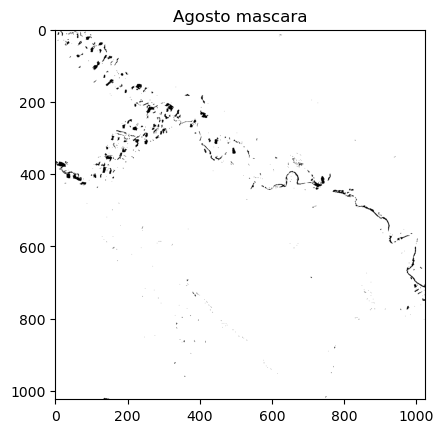

In [3]:
mask_agosto = np.zeros_like(salida_agosto)
mask_agosto[salida_agosto > 150] = 255

plt.figure()
plt.title('Agosto mascara')
plt.imshow(mask_agosto, 'gray')

Imagenes septiembre

/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_75583/780377354.py:4: RuntimeWarning: divide by zero encountered in divide
  salida_septiembre = (banda4 - banda5) / (banda4 + banda5)
/var/folders/b8/1c7dtr794fs88lkk9sjpwyx00000gn/T/ipykernel_75583/780377354.py:4: RuntimeWarning: invalid value encountered in divide
  salida_septiembre = (banda4 - banda5) / (banda4 + banda5)


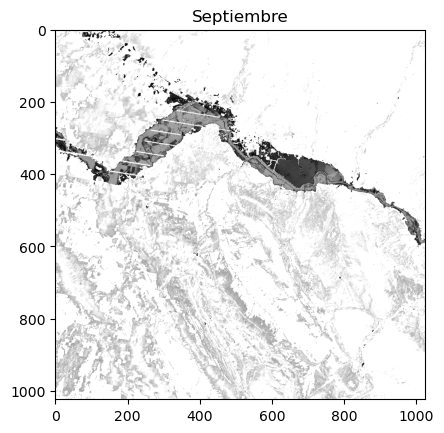

In [4]:
banda4 = cv2.imread('../Data/Inpaint/inpaint_septiembre_banda4.tif', 0)
banda5 = cv2.imread('../Data/Inpaint/inpaint_septiembre_banda5.tif', 0)

salida_septiembre = (banda4 - banda5) / (banda4 + banda5)
salida_septiembre = cv2.convertScaleAbs(salida_septiembre, alpha=255.0)

plt.figure()
plt.title('Septiembre')
plt.imshow(salida_septiembre, 'gray')

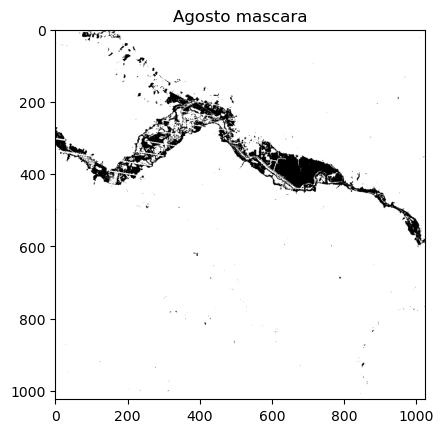

In [5]:
mask_sept = np.zeros_like(salida_septiembre)
mask_sept[salida_septiembre > 150] = 255

plt.figure()
plt.title('Agosto mascara')
plt.imshow(mask_sept, 'gray')

Cálculo del area de inundación en dos momentos agosto y septimbre

In [6]:
n_pixels = np.sum(mask_agosto < 20)
print('Number of pixels in the mask:', n_pixels)
print('km2 fired area:', n_pixels * 0.0009)

Number of pixels in the mask: 10893
km2 fired area: 9.8037


In [7]:
n_pixels = np.sum(mask_sept < 20)
print('Number of pixels in the mask:', n_pixels)
print('km2 fired area:', n_pixels * 0.0009)

Number of pixels in the mask: 47524
km2 fired area: 42.7716


### Arizona

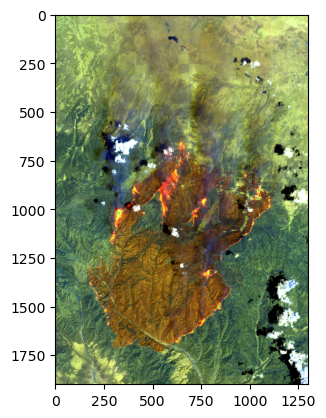

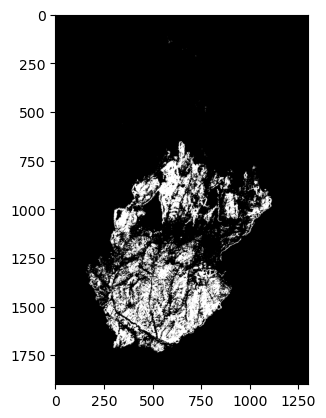

Número de píxeles en la máscara: 240835
Área en km2 del área afectada por el fuego: 216.7515


In [8]:
# Importar las bibliotecas necesarias
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Leer las bandas de la imagen desde archivos TIFF
r = cv2.imread('../Data/arizona/banda7.tif', 0)
g = cv2.imread('../Data/arizona/banda5.tif', 0)
b = cv2.imread('../Data/arizona/banda4.tif', 0)

# Combinar las bandas para formar la imagen
image = cv2.merge((b, g, r))

# Convertir la imagen de espacio de color BGR a RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(image)
plt.show()

# Convertir la imagen a espacio de color HSV
img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Crear una máscara con la parte roja de la imagen
# Definir los límites inferior y superior para el color rojo en HSV
lower_red = np.array([0, 100, 100], dtype=np.uint8)
upper_red = np.array([20, 255, 255], dtype=np.uint8)
mask = cv2.inRange(img_hsv, lower_red, upper_red)

# Mostrar la máscara
plt.imshow(mask, cmap='gray')
plt.show()

# Obtener el número de píxeles en la máscara
n_pixels = np.sum(mask == 255)
print('Número de píxeles en la máscara:', n_pixels)
print('Área en km2 del área afectada por el fuego:', n_pixels * 0.0009)

### Adra

Text(0.5, 1.0, 'Final')

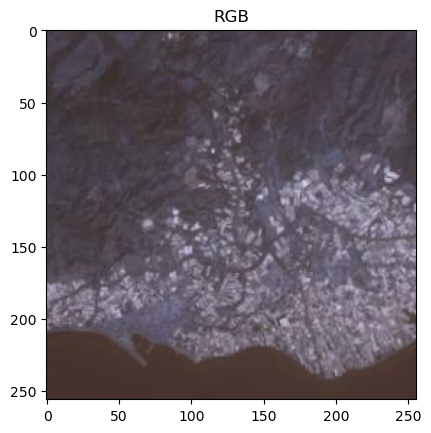

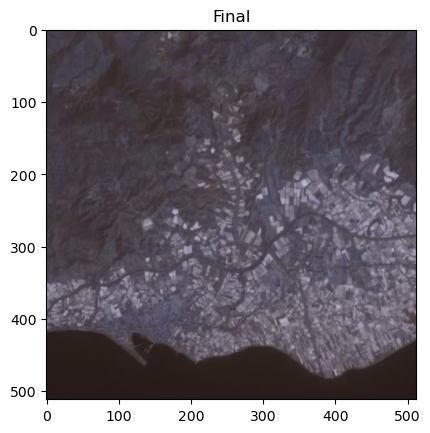

In [9]:
import cv2
import numpy as np

# Lee la imagen RGB
rgb_image = cv2.imread('../Data/adra/rgb.jpg')

# Convierte la imagen RGB al espacio de color HSV
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

# Lee la banda pancromática (escala de grises)
pan_band = cv2.imread('../Data/adra/banda8.tif', 0)  # Carga como escala de grises

# Redimensiona los canales de color y saturación de la imagen HSV para que coincidan con las dimensiones de la banda pancromática
resized_hsv_image = cv2.resize(hsv_image, (pan_band.shape[1], pan_band.shape[0]))

# Divide la imagen HSV redimensionada en canales de Tono (H), Saturación (S) y Valor (V)
h, s, v = cv2.split(resized_hsv_image)

# Reemplaza el canal de Valor (luminancia) de la imagen HSV con la banda pancromática
merged_hsv_image = cv2.merge((h, s, pan_band))

# Convierte la imagen HSV fusionada de nuevo al espacio de color RGB
final_rgb_image = cv2.cvtColor(merged_hsv_image, cv2.COLOR_HSV2BGR)

# Muestra la imagen RGB original
plt.figure()
plt.imshow(rgb_image)
plt.title('RGB')

# Muestra la imagen RGB final después de la fusión con la banda pancromática
plt.figure()
plt.imshow(final_rgb_image)
plt.title('Final')




### Bibliografía

- https://www.linkedin.com/pulse/ndvi-ndbi-ndwi-calculation-using-landsat-7-8-tek-bahadur-kshetri/
- https://mappinggis.com/2019/05/combinaciones-de-bandas-en-imagenes-de-satelite-landsat-y-sentinel/
- https://es.wikipedia.org/wiki/%C3%8Dndice_diferencial_de_agua_normalizado
